## World Happiness Data: Analysis of Variable Relationships



In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [133]:
from pandasql import sqldf
pysqldf=lambda q :sqldf(q,globals())
# creating a wrapper function , so we can provide the query 'q'
#without writing the syntax again and again

In [134]:
happiness=pd.read_csv('data/2015.csv')
happiness.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [135]:
happ_df=pd.DataFrame(happiness)

 Scatterplot between independent and dependent variables
===

Just giving an overview of scatterplots between independent and dependent variables, explanation will be given later in the research questions.

## Scatterplot for Happiness Score and GDP

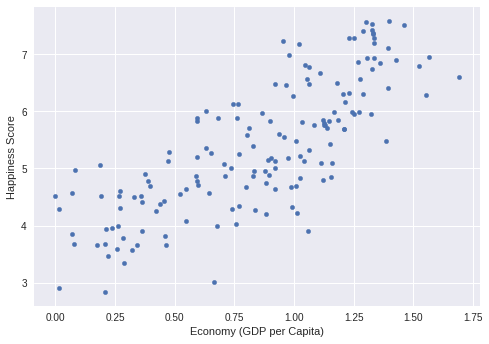

In [136]:
happ_df.plot.scatter(x='Economy (GDP per Capita)', y = 'Happiness Score')

We can see that there is a strong positive correlation here , because as the GDP increases happiness score also increases

Correlation b/w Happiness Score and Family

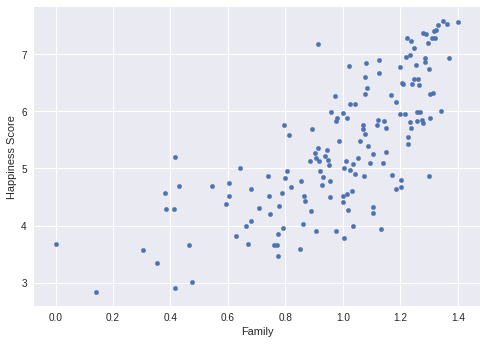

In [137]:
happ_df.plot.scatter(x='Family',y='Happiness Score')

## Correlation b/w Happiness Score and Health (Life Expectancy)

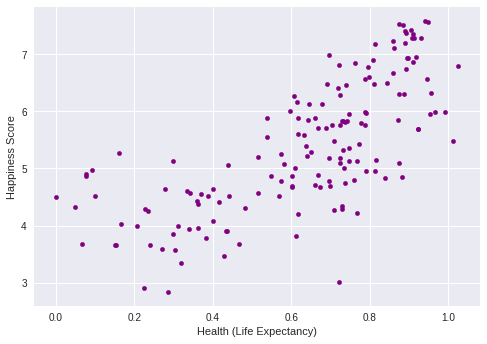

In [138]:
happ_df.plot.scatter(x='Health (Life Expectancy)',y='Happiness Score',color='purple')

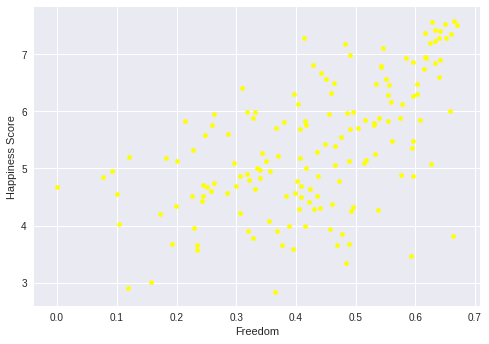

In [139]:
happ_df.plot.scatter(x='Freedom',y='Happiness Score',color='yellow')

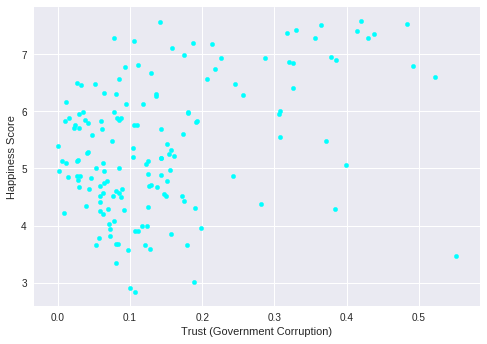

In [140]:
happ_df.plot.scatter(x='Trust (Government Corruption)',y='Happiness Score',color='cyan')

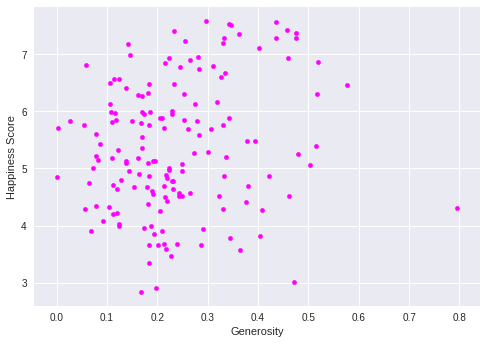

In [141]:
happ_df.plot.scatter(x='Generosity',y='Happiness Score',color='magenta')

## Just a general question to get an idea about data analysis


## Q1) What are the 10 happiest countries?

In [142]:
query = ''' SELECT "Country" AS "Top 10 happiest countries in the world" ,"Happiness Rank", "Happiness Score"
FROM happ_df
WHERE "Happiness Rank" <= 10
'''
result=pysqldf(query)
result

,Top 10 happiest countries in the world,Happiness Rank,Happiness Score
0,Switzerland,1,7.587
1,Iceland,2,7.561
2,Denmark,3,7.527
3,Norway,4,7.522
4,Canada,5,7.427
5,Finland,6,7.406
6,Netherlands,7,7.378
7,Sweden,8,7.364
8,New Zealand,9,7.286
9,Australia,10,7.284


## Visualization & Analysis

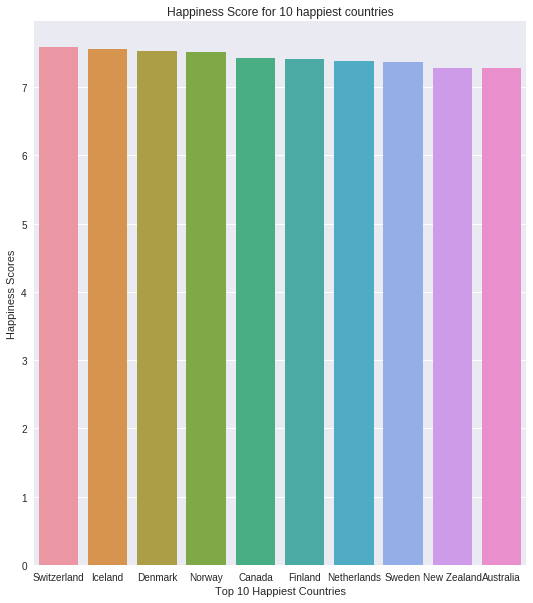

In [143]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.barplot(happ_df['Country'][0:10],happ_df['Happiness Score'])
plt.xlabel('Top 10 Happiest Countries')
plt.ylabel('Happiness Scores')
plt.title("Happiness Score for 10 happiest countries")

## Observation
We can observe that Switzerland is the happiest country in the world

## Question 1 part (ii)
## What are the 10 least happy countries?

In [144]:
query = ''' SELECT "Country" AS "10 least happy countries in the world" , "Happiness Score","Happiness Rank"
FROM happ_df
WHERE "Happiness Rank" >148 AND "Happiness Rank" <=158
ORDER BY "Happiness Rank" DESC;
'''
result=pysqldf(query)
result

,10 least happy countries in the world,Happiness Score,Happiness Rank
0,Togo,2.839,158
1,Burundi,2.905,157
2,Syria,3.006,156
3,Benin,3.340,155
4,Rwanda,3.465,154
5,Afghanistan,3.575,153
6,Burkina Faso,3.587,152
7,Ivory Coast,3.655,151
8,Guinea,3.656,150
9,Chad,3.667,149


## Visualization & Analysis

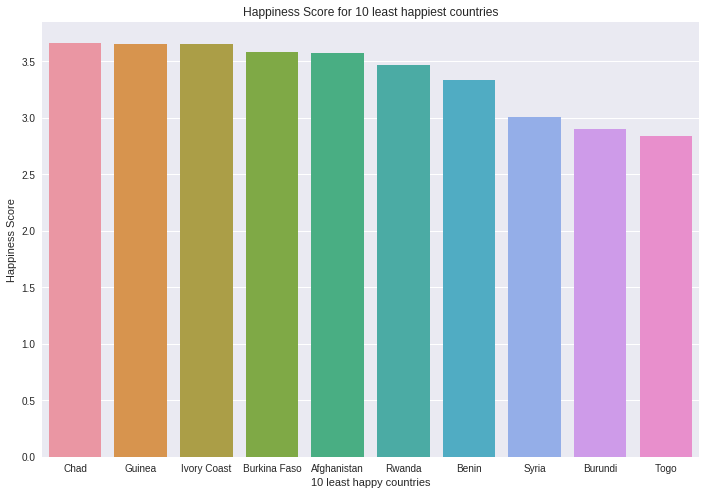

In [145]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.barplot(happ_df['Country'][148:],happ_df['Happiness Score'])
plt.xlabel('10 least happy countries')
plt.ylabel('Happiness Score')
plt.title("Happiness Score for 10 least happiest countries")

## Observation
<span class="mark">We can observe that Togo is the least happy country in the world</span>

## Research Questions 

## Q2) Which countries in Central and Eastern Europe have a high GDP but happiness scores are lower than average Happiness score?

In [146]:
avg_GDP=happ_df["Economy (GDP per Capita)"].mean()
print('Average GDP is:',avg_GDP)
avg_score=happ_df["Happiness Score"].mean()
print('Average Happiness score is:',avg_score)

Average GDP is: 0.84613721519
Average Happiness score is: 5.37573417722


## Average GDP is: 0.84613721519
## Average Happiness score is: 5.37573417722

In [147]:
query = ''' SELECT "Country", "Region" , "Economy (GDP per Capita)" AS "GDP", "Happiness Score"
FROM happ_df
WHERE "Happiness Score" <5.37 AND "Economy (GDP per Capita)" >0.846 AND "Region" = "Central and Eastern Europe"
Order By "Economy (GDP per Capita)" DESC
'''
result2=pysqldf(query)
result2

,Country,Region,GDP,Happiness Score
0,Hungary,Central and Eastern Europe,1.12094,4.800
1,Latvia,Central and Eastern Europe,1.11312,5.098
2,Romania,Central and Eastern Europe,1.04345,5.124
3,Azerbaijan,Central and Eastern Europe,1.02389,5.212
4,Bulgaria,Central and Eastern Europe,1.01216,4.218
5,Montenegro,Central and Eastern Europe,0.97438,5.192
6,Serbia,Central and Eastern Europe,0.92053,5.123
7,Macedonia,Central and Eastern Europe,0.91851,5.007
8,Albania,Central and Eastern Europe,0.87867,4.959


## Visualization and analysis

## A simpler way

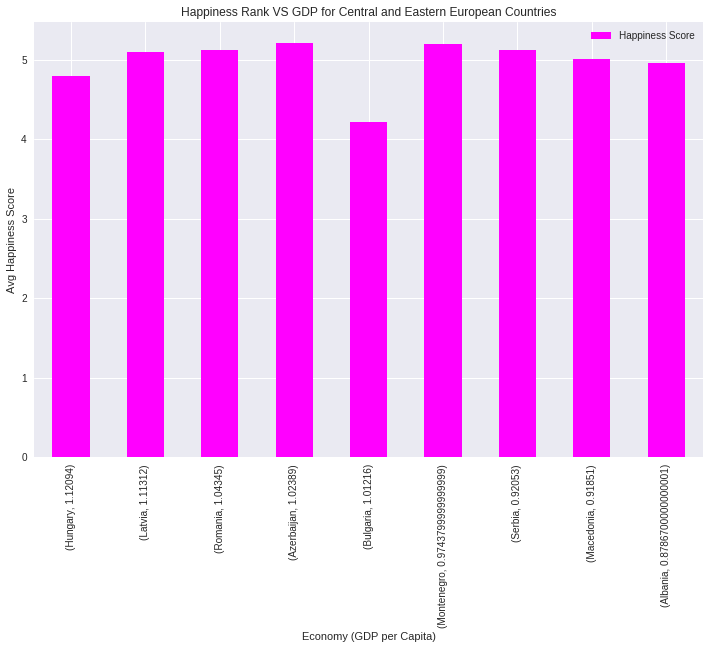

In [148]:
result2.plot.bar(x=['Country','GDP'],y='Happiness Score',figsize=(12,8),color='magenta')
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Avg Happiness Score")
plt.title("Happiness Rank VS GDP for Central and Eastern European Countries")
plt.show()

## Spearman rho's Correlation between Economy (GDP per Capita) and Happiness Score for Central and Eastern Europe

In [149]:
required_data = happ_df[(happ_df["Region"] == "Central and Eastern Europe") & 
                        (happ_df["Economy (GDP per Capita)"] > avg_GDP) & 
                        (happ_df["Happiness Score"] < avg_score)]

# Calculate the Spearman correlation coefficient and p-value
corr, pval = spearmanr(required_data["Economy (GDP per Capita)"], required_data["Happiness Score"])
print("Spearman correlation coefficient:", corr)
print("p-value:", pval)

Spearman correlation coefficient: 0.0333333333333
p-value: 0.932156735541


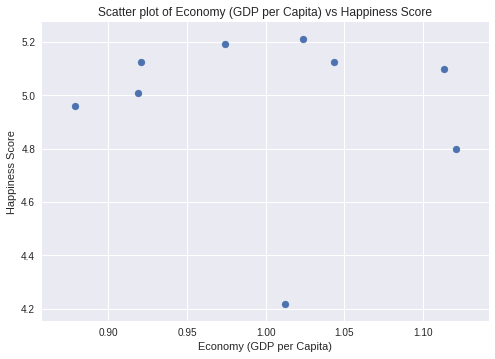

In [150]:
plt.scatter(x='Economy (GDP per Capita)',y='Happiness Score',data=required_data, cmap='coolwarm')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Scatter plot of Economy (GDP per Capita) vs Happiness Score')
plt.show()

## Cross Tabulation

In [151]:
cross_tab=pd.crosstab(index=result2['Country'],columns=result2['GDP'],values=result2['Happiness Score'],
                      aggfunc='mean',margins=True)
cross_tab

GDP,0.8786700000000001,0.91851,0.92053,0.9743799999999999,1.01216,1.02389,1.04345,1.11312,1.12094,All
Country,,,,,,,,,,
Albania,4.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.959000
Azerbaijan,NaN,NaN,NaN,NaN,NaN,5.212,NaN,NaN,NaN,5.212000
Bulgaria,NaN,NaN,NaN,NaN,4.218,NaN,NaN,NaN,NaN,4.218000
Hungary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,4.800000
Latvia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.098,NaN,5.098000
Macedonia,NaN,5.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.007000
Montenegro,NaN,NaN,NaN,5.192,NaN,NaN,NaN,NaN,NaN,5.192000
Romania,NaN,NaN,NaN,NaN,NaN,NaN,5.124,NaN,NaN,5.124000
Serbia,NaN,NaN,5.123,NaN,NaN,NaN,NaN,NaN,NaN,5.123000


## Pivot table

In [152]:
pivot_table=result2.pivot_table(values="Happiness Score",index="Country",columns="GDP",fill_value='')
pivot_table

GDP,0.87867,0.91851,0.92053,0.97438,1.01216,1.02389,1.04345,1.11312,1.12094
Country,,,,,,,,,
Albania,4.959,,,,,,,,
Azerbaijan,,,,,,5.212,,,
Bulgaria,,,,,4.218,,,,
Hungary,,,,,,,,,4.8
Latvia,,,,,,,,5.098,
Macedonia,,5.007,,,,,,,
Montenegro,,,,5.192,,,,,
Romania,,,,,,,5.124,,
Serbia,,,5.123,,,,,,


## Q3) What is the difference between the happiness scores of different regions? Are certain regions happier than others?

In [153]:
query =''' SELECT "Region",AVG("Happiness Score") AS "Avg Happiness Score"
FROM happ_df
Group By "Region" 
Order By  "Avg Happiness Score" DESC;
'''
result3=pysqldf(query)
result3

,Region,Avg Happiness Score
0,Australia and New Zealand,7.285000
1,North America,7.273000
2,Western Europe,6.689619
3,Latin America and Caribbean,6.144682
4,Eastern Asia,5.626167
5,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
7,Southeastern Asia,5.317444
8,Southern Asia,4.580857
9,Sub-Saharan Africa,4.202800


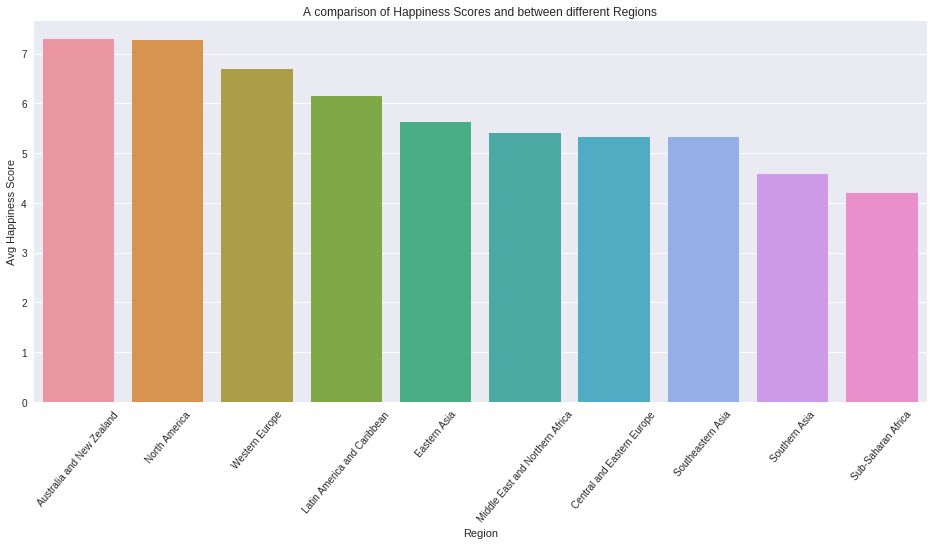

In [154]:
#Code for barplot
avg_happiness=happ_df.groupby('Region')['Happiness Score'].mean().reset_index()
avg_happiness=avg_happiness.sort_values(by="Happiness Score",ascending=False)
plt.figure(figsize=(16,7))
sns.barplot(x="Region",y="Happiness Score",data=avg_happiness)
plt.title("A comparison of Happiness Scores and between different Regions")
plt.xticks(rotation=50)
plt.xlabel("Region")
plt.ylabel("Avg Happiness Score")
plt.show()


Conclusion: Heights of bar indicate difference in Avg Happiness Scores for the regions, Regions with higher bars can be considered happier than the regions with shorter bars. Bar graph provides a basic overview of the differences b/w the Avg happiness scores of the reasons, a better statistical test such as spearman's correlation would be better to come to a clear conclusion

## An Alternate approach

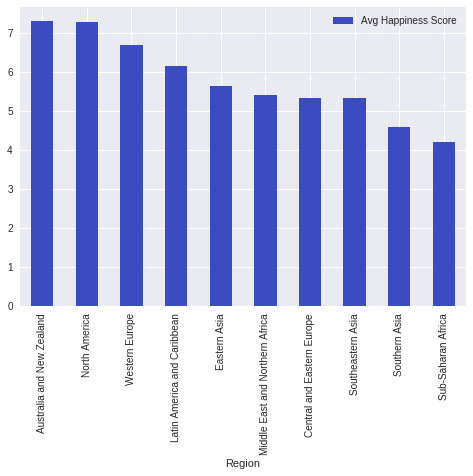

In [155]:
result3.plot.bar(x="Region",y="Avg Happiness Score",colormap="coolwarm")
plt.show()

In [156]:
avg_score=happ_df["Happiness Score"].mean()
avg_score

5.3757341772151896

## Correlation Analysis using Spearman's correlation

In [157]:
corr,pvalue=stats.spearmanr(result3['Region'],result3['Avg Happiness Score'])
print("Spearman\'s correlation coefficient is:",corr)
print("P-value is:",pvalue)

Spearman's correlation coefficient is: -0.406060606061
P-value is: 0.244282294087


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


## Conclusion:
we can reject the null hypothesis that there is no correlation b/w Happiness Scores and being in a particular Region. as the value of p < 0.05.
The correlation is moderate negative correlation as region's happiness increase, the

Region is categorical variable, to plot it I will be using a LabelEncoder from sklearn.preprocessing module in Python to convert categorical variables into numerical codes

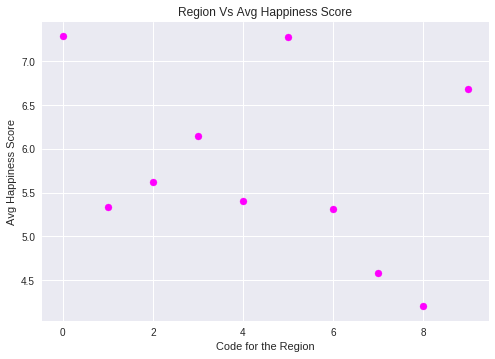

In [158]:
encode_label=LabelEncoder()
avg_happiness['Code_for_region']=encode_label.fit_transform(avg_happiness['Region'])
plt.scatter(avg_happiness['Code_for_region'],avg_happiness['Happiness Score'],color='magenta')
plt.xlabel("Code for the Region")
plt.ylabel("Avg Happiness Score")
plt.title("Region Vs Avg Happiness Score")
plt.show()



## PIVOT TABLE

In [159]:
pivot_table=happ_df.pivot_table(values="Happiness Score",index="Region",aggfunc="mean")
pivot_table=pivot_table.sort_values(by='Happiness Score')

pivot_table

,Happiness Score
Region,
Sub-Saharan Africa,4.202800
Southern Asia,4.580857
Southeastern Asia,5.317444
Central and Eastern Europe,5.332931
Middle East and Northern Africa,5.406900
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Western Europe,6.689619
North America,7.273000


## Cross tab

In [160]:
cross_tab=pd.crosstab(happ_df['Region'],columns='Count')
cross_tab['Avg Happiness Score']=happ_df.groupby("Region")["Happiness Score"].mean()
cross_tab=cross_tab[['Count','Avg Happiness Score']]
cross_tab

col_0,Count,Avg Happiness Score
Region,,
Australia and New Zealand,2,7.285000
Central and Eastern Europe,29,5.332931
Eastern Asia,6,5.626167
Latin America and Caribbean,22,6.144682
Middle East and Northern Africa,20,5.406900
North America,2,7.273000
Southeastern Asia,9,5.317444
Southern Asia,7,4.580857
Sub-Saharan Africa,40,4.202800


## Conclusion
There is a notable difference in variation of the happiness score between the regions we can see that Region has an impact on the Happiness Score of a region. However, there might be other factors influencing this as well.
Certain regions such as Australia and New Zealand, North America, Western Europe, Latin America and Caribbean and Eastern Asia have higher average Happiness Scores compared to Middle East and Northern Africa, Central and Eastern Europe, Southeastern Asia and Sub-Saharan Africa

## Q4) What is the relation between life expectancy and Happiness score?

In [161]:
query =''' SELECT "Health (Life Expectancy)" AS "Life Expectancy","Happiness Score"
FROM happ_df
Order By "Life Expectancy" DESC;
'''
result4=pysqldf(query)
result4

,Life Expectancy,Happiness Score
0,1.02525,6.798
1,1.01328,5.474
2,0.99111,5.987
3,0.96538,5.984
4,0.95562,6.329
5,0.95446,5.948
6,0.94784,7.561
7,0.94579,6.575
8,0.94143,7.587
9,0.93156,7.284


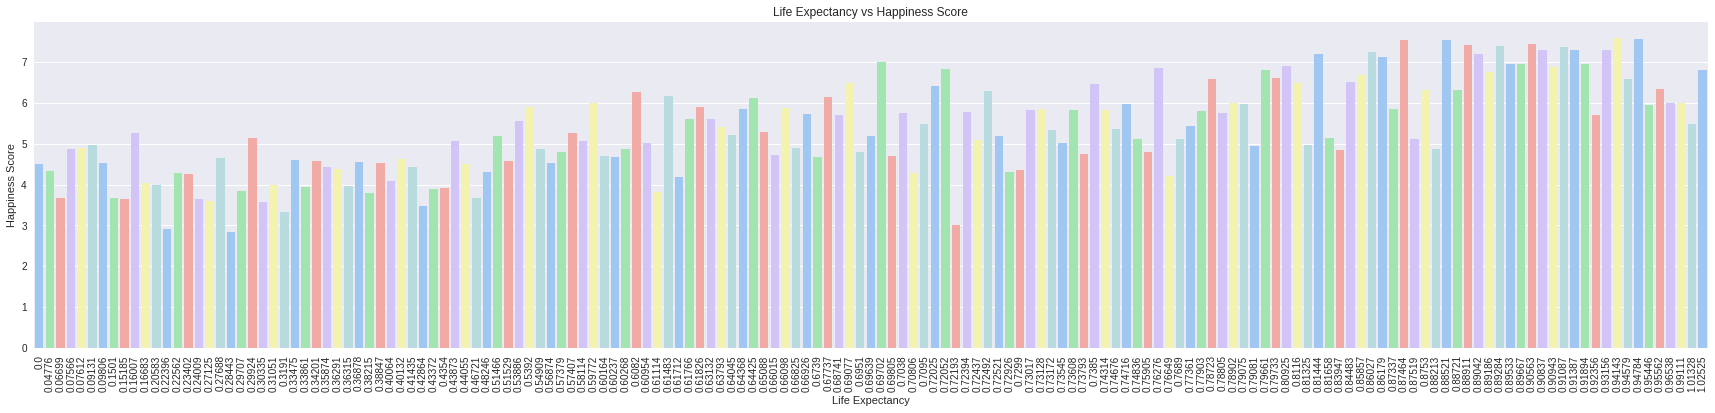

In [162]:
plt.figure(figsize=(30,6))
sns.barplot(x='Life Expectancy',y='Happiness Score',data=result4,palette='pastel')
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Score")
plt.title("Life Expectancy vs Happiness Score")
plt.xticks(rotation=90)
plt.show()

## Correlation

In [163]:
corr,pvalue=spearmanr(result4['Life Expectancy'],result4['Happiness Score'])
print("The value of Spearman's correlation coefficient is:",corr)
print("p-value:",pvalue)


The value of Spearman's correlation coefficient is: 0.756960438604
p-value: 1.25262757011e-30


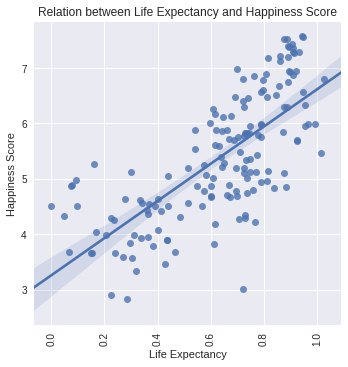

In [164]:
sns.lmplot(x="Life Expectancy",y="Happiness Score",data=result4)
plt.xlabel("Life Expectancy")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Relation between Life Expectancy and Happiness Score")
plt.show()

## Analysis and Conclusion:
Based on the regression plot, we can observe that there is a positive correlation, as life expectancy is increasing, so is the happiness score. However, there are some variations, as the points are scattered, indiciating the factor of "Life Expectancy" Alone is not responsible for affecting the Happiness Score. We have to take into consideration, other factors as well.

## Pivot Table

In [165]:
piv_table=result4.pivot_table(index="Life Expectancy",values="Happiness Score",aggfunc=np.mean)
piv_table

,Happiness Score
Life Expectancy,
0.00000,4.507
0.04776,4.332
0.06699,3.678
0.07566,4.867
0.07612,4.898
0.09131,4.971
0.09806,4.517
0.15010,3.667
0.15185,3.655


In [166]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.03]
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.03']

result4['Life Expectancy Bins'] = pd.cut(result4['Life Expectancy'], bins=bins, labels=bin_labels)

crosstab = pd.crosstab(result4['Life Expectancy Bins'], result4['Happiness Score'], margins=True)
crosstab.columns.name = 'Happiness Score'
crosstab.index.name = 'Life Expectancy'

print(crosstab)

Happiness Score  2.839  2.905  3.0060000000000002  3.34  3.465  3.575  \
Life Expectancy                                                         
0-0.2                0      0                   0     0      0      0   
0.2-0.4              1      1                   0     1      0      1   
0.4-0.6              0      0                   0     0      1      0   
0.6-0.8              0      0                   1     0      0      0   
0.8-1.03             0      0                   0     0      0      0   
All                  1      1                   1     1      1      1   

Happiness Score  3.5869999999999997  3.655  3.656  3.667 ...   \
Life Expectancy                                          ...    
0-0.2                             0      1      0      1 ...    
0.2-0.4                           1      0      1      0 ...    
0.4-0.6                           0      0      0      0 ...    
0.6-0.8                           0      0      0      0 ...    
0.8-1.03                 

## Q4a) Can you determine the relation between Life Expectancy and Happiness Score for each Region?

In [167]:
query =''' SELECT Region, AVG("Health (Life Expectancy)") AS "Avg Life Expectancy",AVG("Happiness Score") AS "Avg Happiness Score"
FROM happ_df
Group By Region
Order By "Avg Life Expectancy" DESC;
'''
result4a=pysqldf(query)
result4a

,Region,Avg Life Expectancy,Avg Happiness Score
0,Australia and New Zealand,0.919965,7.285000
1,Western Europe,0.909148,6.689619
2,North America,0.883710,7.273000
3,Eastern Asia,0.877388,5.626167
4,Central and Eastern Europe,0.718774,5.332931
5,Middle East and Northern Africa,0.705616,5.406900
6,Latin America and Caribbean,0.703870,6.144682
7,Southeastern Asia,0.677357,5.317444
8,Southern Asia,0.540830,4.580857
9,Sub-Saharan Africa,0.282332,4.202800


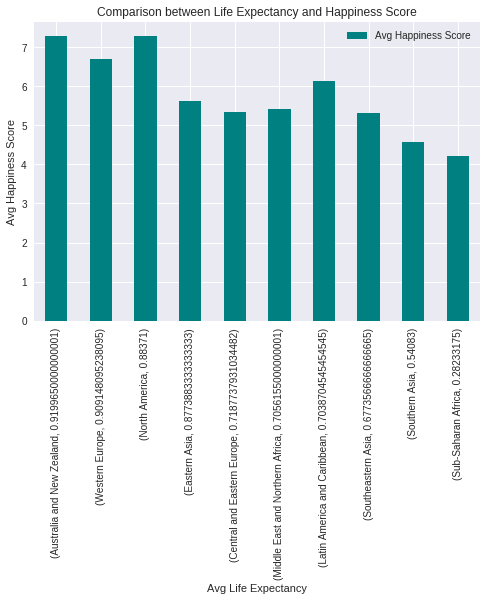

In [168]:
result4a.plot.bar(x=['Region','Avg Life Expectancy'],y="Avg Happiness Score",color='Teal')
plt.xlabel("Avg Life Expectancy")
plt.ylabel("Avg Happiness Score")
plt.title("Comparison between Life Expectancy and Happiness Score")
plt.show()

## Correlation

In [169]:
corr,pvalue=spearmanr(result4a['Avg Life Expectancy'],result4a['Avg Happiness Score'])
print("The value of Spearman's correlation coefficient is:",corr)
print("p-value:",pvalue)

The value of Spearman's correlation coefficient is: 0.90303030303
p-value: 0.000343612197763


## lmplot

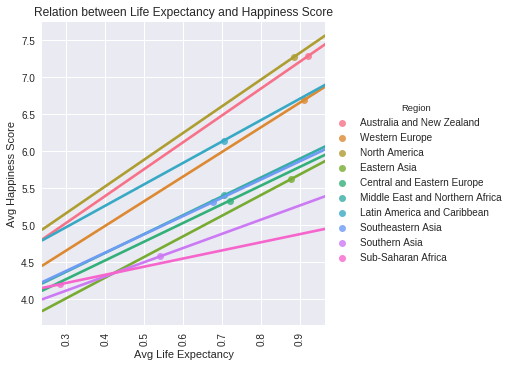

In [170]:
sns.lmplot(x="Avg Life Expectancy",y="Avg Happiness Score",data=result4a,hue="Region")
plt.xlabel("Avg Life Expectancy")
plt.xticks(rotation=90)
plt.ylabel("Avg Happiness Score")
plt.title("Relation between Life Expectancy and Happiness Score")
plt.show()

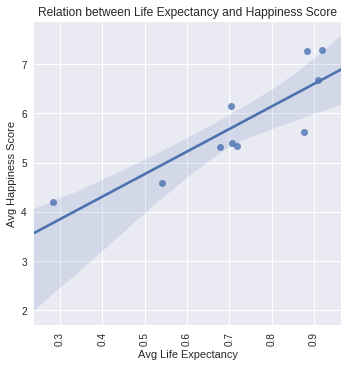

In [171]:
sns.lmplot(x="Avg Life Expectancy",y="Avg Happiness Score",data=result4a)
plt.xlabel("Avg Life Expectancy")
plt.xticks(rotation=90)
plt.ylabel("Avg Happiness Score")
plt.title("Relation between Life Expectancy and Happiness Score")
plt.show()

## Pivot table

In [172]:
pd.pivot_table(result4a,values=['Avg Happiness Score','Avg Life Expectancy'],index='Region',aggfunc='mean')

,Avg Happiness Score,Avg Life Expectancy
Region,,
Australia and New Zealand,7.285000,0.919965
Central and Eastern Europe,5.332931,0.718774
Eastern Asia,5.626167,0.877388
Latin America and Caribbean,6.144682,0.703870
Middle East and Northern Africa,5.406900,0.705616
North America,7.273000,0.883710
Southeastern Asia,5.317444,0.677357
Southern Asia,4.580857,0.540830
Sub-Saharan Africa,4.202800,0.282332


## Cross tab

In [173]:
cross_tab=pd.crosstab(index=result4a['Region'],columns=result4a['Avg Life Expectancy'],values=result4a['Avg Happiness Score'],
                      aggfunc='mean',margins=True)
cross_tab.replace(np.nan,'',inplace=True)
cross_tab

Avg Life Expectancy,0.28233175,0.54083,0.6773566666666665,0.7038704545454545,0.7056155000000001,0.7187737931034482,0.8773883333333333,0.88371,0.909148095238095,0.9199650000000001,All
Region,,,,,,,,,,,
Australia and New Zealand,,,,,,,,,,7.285,7.285000
Central and Eastern Europe,,,,,,5.33293,,,,,5.332931
Eastern Asia,,,,,,,5.62617,,,,5.626167
Latin America and Caribbean,,,,6.14468,,,,,,,6.144682
Middle East and Northern Africa,,,,,5.4069,,,,,,5.406900
North America,,,,,,,,7.273,,,7.273000
Southeastern Asia,,,5.31744,,,,,,,,5.317444
Southern Asia,,4.58086,,,,,,,,,4.580857
Sub-Saharan Africa,4.2028,,,,,,,,,,4.202800


# Q5) What is the relation between Trust (Government Corruption) and the Happiness Score?

In [174]:
query=''' SELECT  "Trust (Government Corruption)" AS "Trust", "Happiness Score"
FROM happ_df
Order By "Trust" ASC;

'''
result5=pysqldf(query)
result5

,Trust,Happiness Score
0,0.00000,5.399
1,0.00227,4.949
2,0.00649,5.124
3,0.00872,4.218
4,0.01031,5.833
5,0.01078,5.102
6,0.01140,6.168
7,0.01397,4.857
8,0.01615,5.889
9,0.02299,5.709


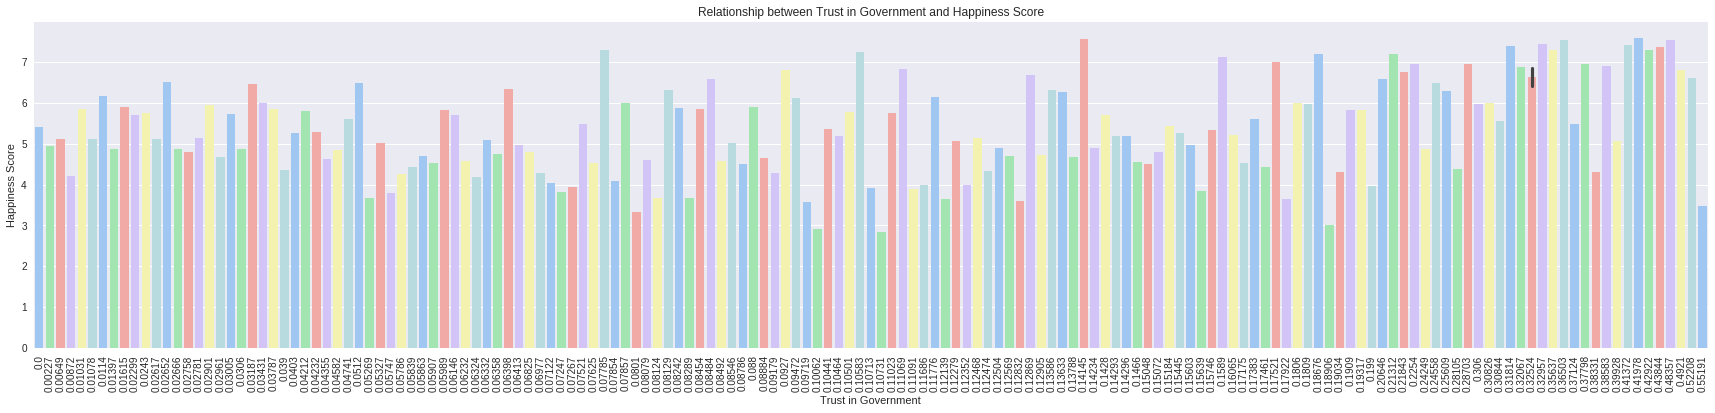

In [175]:
plt.figure(figsize=(30,6))
sns.barplot(x='Trust',y='Happiness Score',data=result5,palette='pastel')
plt.xlabel("Trust in Government")
plt.ylabel("Happiness Score")
plt.title("Relationship between Trust in Government and Happiness Score")
plt.xticks(rotation=90)
plt.show()


## Regression plot

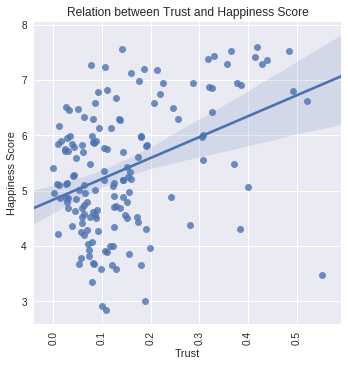

In [176]:
sns.lmplot(x="Trust",y="Happiness Score",data=result5)
plt.xlabel("Trust")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Relation between Trust and Happiness Score")
plt.show()

## Lets find the Spearman's correlation coefficient to reach a clearer conclusion

In [177]:
corr,pvalue=spearmanr(result5['Trust'],result5['Happiness Score'])
print("The value of Spearman's correlation coefficient is:",corr)
print("p-value:",pvalue)

The value of Spearman's correlation coefficient is: 0.30239686746
p-value: 0.000112602786299


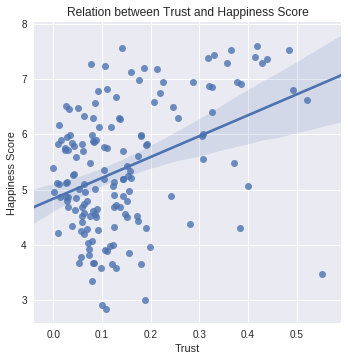

In [178]:
sns.lmplot(x="Trust",y="Happiness Score",data=result5)
plt.xlabel("Trust")
plt.ylabel("Happiness Score")
plt.title("Relation between Trust and Happiness Score")
plt.show()

## <span class="mark">Note: Higher value of Trust(Government Corruption) means people have more Trust in their government and vice versa</span>

As Trust(Government Corruption) is increasing, Happiness score is decreasing, but this is not a very strong relationship, because we can see there are some points with higher values of Happiness Score and Higher Value of Trust(Government Corruption) as well.So there are some outliers on the right side whereas the left side indicates that countries with lower trust in government have lower happiness score. Also, note that points are scattered around the line, this means that Trust(Government Corruption) is not the sole factor affecting the Happiness Score 

## Pivot table

In [179]:
piv_table=result5.pivot_table(index='Trust',values='Happiness Score',aggfunc=np.mean)
piv_table

,Happiness Score
Trust,
0.00000,5.399
0.00227,4.949
0.00649,5.124
0.00872,4.218
0.01031,5.833
0.01078,5.102
0.01140,6.168
0.01397,4.857
0.01615,5.889


## Cross tab

In [180]:
bins=[0,0.2,0.5,1.0]
labels=['Low','Medium','High']
happ_df['Bin for Trust']=pd.cut(happ_df['Trust (Government Corruption)'],bins=bins,labels=labels)
crosstab=pd.crosstab(index=happ_df['Bin for Trust'],columns=happ_df['Happiness Score'],normalize='columns')
crosstab

Happiness Score,2.839,2.905,3.006,3.34,3.465,3.575,3.587,3.655,3.656,3.667,...,7.284,7.286,7.364,7.378,7.406,7.427,7.522,7.527,7.561,7.587
Bin for Trust,,,,,,,,,,,,,,,,,,,,,
Low,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
High,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
happ_df['Bin for Trust'].value_counts()

Low       125
Medium     30
High        2
Name: Bin for Trust, dtype: int64

In [182]:
high_bin=happ_df[happ_df['Bin for Trust']=='High']
high_bin

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Bin for Trust
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.0786,0.79733,0.64040,0.52208,0.32573,1.55674,High
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042,High


## Q5a) What is the relation between the Trust (Government Corruption) and Happiness Scores for each region?

In [183]:
query=''' SELECT "Region",AVG("Trust (Government Corruption)") AS "Avg Trust",AVG("Happiness Score") AS "Avg Happiness Score"
FROM happ_df
GROUP BY "Region"
ORDER BY "Avg Trust" DESC;
'''
result5a=pysqldf(query)
result5a

,Region,Avg Trust,Avg Happiness Score
0,Australia and New Zealand,0.392795,7.285000
1,North America,0.244235,7.273000
2,Western Europe,0.231463,6.689619
3,Middle East and Northern Africa,0.181702,5.406900
4,Southeastern Asia,0.151276,5.317444
5,Eastern Asia,0.127695,5.626167
6,Sub-Saharan Africa,0.123878,4.202800
7,Latin America and Caribbean,0.117172,6.144682
8,Southern Asia,0.102536,4.580857
9,Central and Eastern Europe,0.086674,5.332931


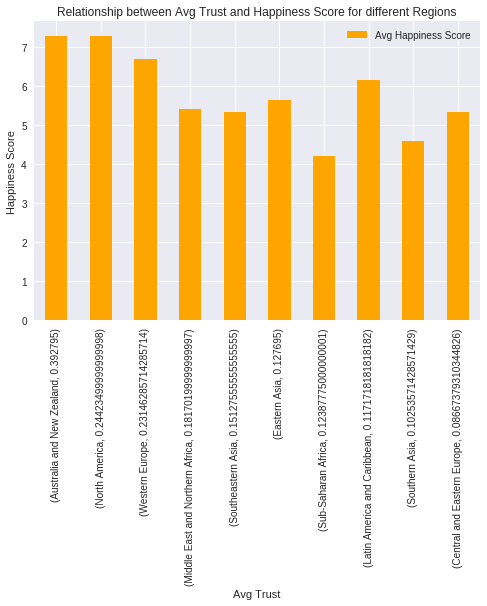

In [184]:
plt.figure(figsize=(12,6))
result5a.plot.bar(x=["Region","Avg Trust"],y="Avg Happiness Score",color='Orange')
plt.xlabel("Avg Trust")
plt.ylabel("Happiness Score")
plt.title("Relationship between Avg Trust and Happiness Score for different Regions")
plt.xticks(rotation=90)
plt.show()


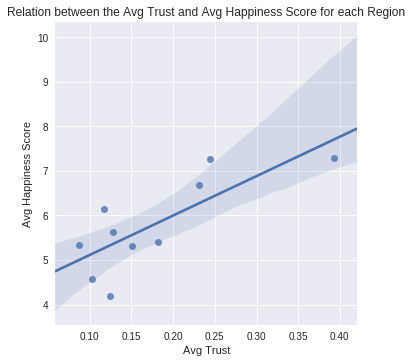

In [185]:
sns.lmplot(x='Avg Trust',y='Avg Happiness Score',data=result5a)
plt.xlabel("Avg Trust")
plt.ylabel("Avg Happiness Score")
plt.title("Relation between the Avg Trust and Avg Happiness Score for each Region")
plt.show()

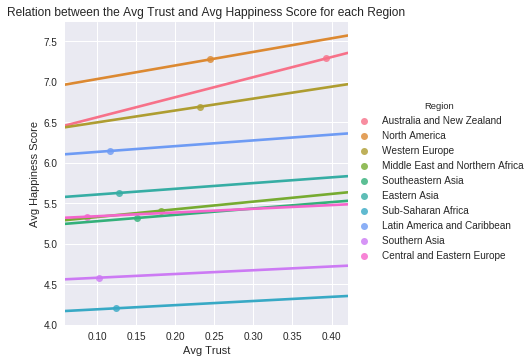

In [186]:
sns.lmplot(x='Avg Trust',y='Avg Happiness Score',data=result5a,hue="Region")
plt.xlabel("Avg Trust")
plt.ylabel("Avg Happiness Score")
plt.title("Relation between the Avg Trust and Avg Happiness Score for each Region")
plt.show()

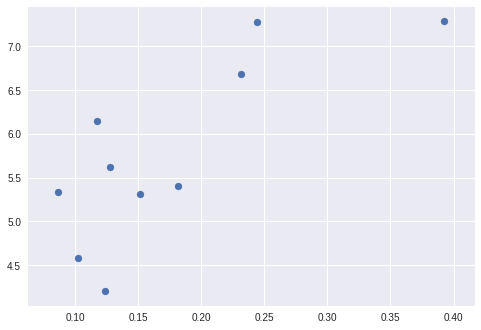

In [187]:
plt.scatter(result5a['Avg Trust'],result5a['Avg Happiness Score'])
plt.show()

## Correlation

In [188]:
corr,pvalue=stats.spearmanr(result5a['Avg Trust'],result5a['Avg Happiness Score'])
print("Spearman\'s correlation coefficient is:",corr)
print("P-value is:",pvalue)

Spearman's correlation coefficient is: 0.709090909091
P-value is: 0.0216659233675


## Pivot Table

In [189]:
piv_table=result5a.pivot_table(values=["Avg Trust","Avg Happiness Score"],index="Region"
                               ,aggfunc="mean")
piv_table

,Avg Happiness Score,Avg Trust
Region,,
Australia and New Zealand,7.285000,0.392795
Central and Eastern Europe,5.332931,0.086674
Eastern Asia,5.626167,0.127695
Latin America and Caribbean,6.144682,0.117172
Middle East and Northern Africa,5.406900,0.181702
North America,7.273000,0.244235
Southeastern Asia,5.317444,0.151276
Southern Asia,4.580857,0.102536
Sub-Saharan Africa,4.202800,0.123878


## Cross Tab

In [190]:
cross_tab=pd.crosstab(index=result5a['Region'],columns=result5a['Avg Trust'],values=result5a['Avg Happiness Score'],
                      aggfunc='mean',margins=True)
cross_tab.replace(np.nan,'',inplace=True)

cross_tab

Avg Trust,0.08667379310344826,0.10253571428571429,0.1171718181818182,0.12387775000000001,0.127695,0.15127555555555555,0.18170199999999997,0.23146285714285714,0.24423499999999998,0.392795,All
Region,,,,,,,,,,,
Australia and New Zealand,,,,,,,,,,7.285,7.285000
Central and Eastern Europe,5.33293,,,,,,,,,,5.332931
Eastern Asia,,,,,5.62617,,,,,,5.626167
Latin America and Caribbean,,,6.14468,,,,,,,,6.144682
Middle East and Northern Africa,,,,,,,5.4069,,,,5.406900
North America,,,,,,,,,7.273,,7.273000
Southeastern Asia,,,,,,5.31744,,,,,5.317444
Southern Asia,,4.58086,,,,,,,,,4.580857
Sub-Saharan Africa,,,,4.2028,,,,,,,4.202800


# Q5b) What is the relationship between the Trust(Government Corruption) and Happiness Score for the Latin America and Caribbean region

In [191]:
query=''' SELECT "Country","Trust (Government Corruption)", "Happiness Score"
FROM happ_df
WHERE region = "Latin America and Caribbean"
Order By "Trust (Government Corruption)" DESC;

'''
result5b=pysqldf(query)
result5b

,Country,Trust (Government Corruption),Happiness Score
0,Uruguay,0.24558,6.485
1,Mexico,0.21312,7.187
2,Nicaragua,0.19317,5.828
3,Ecuador,0.18090,5.975
4,Brazil,0.17521,6.983
5,Haiti,0.17175,4.518
6,Dominican Republic,0.14234,4.885
7,Suriname,0.13633,6.269
8,Chile,0.12869,6.670
9,El Salvador,0.11776,6.130


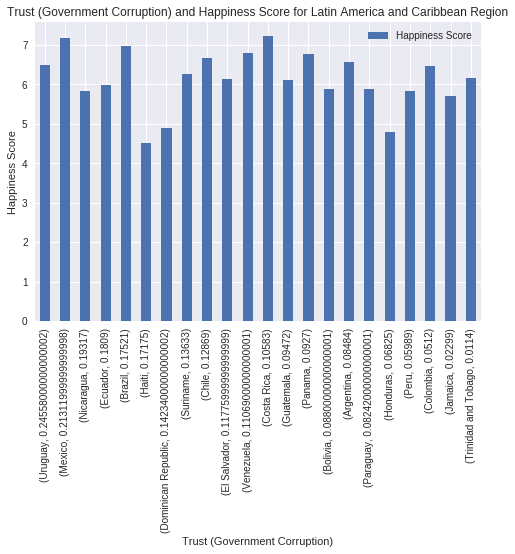

In [192]:
result5b.plot.bar(x=["Country","Trust (Government Corruption)"], y="Happiness Score")
plt.xlabel("Trust (Government Corruption)")
plt.ylabel("Happiness Score")
plt.title("Trust (Government Corruption) and Happiness Score for Latin America and Caribbean Region")
plt.show()

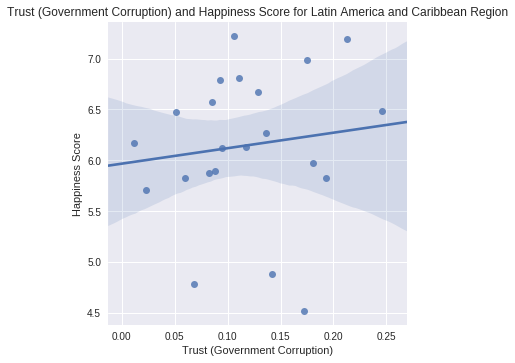

In [193]:
sns.lmplot(x="Trust (Government Corruption)",y="Happiness Score",data=result5b)
plt.xlabel("Trust (Government Corruption)")
plt.ylabel("Happiness Score")
plt.title("Trust (Government Corruption) and Happiness Score for Latin America and Caribbean Region")
plt.show()

There seems to be no clear pattern here , so to confirm this let's calculate the correlation coefficient

In [194]:
##normal correlation
specific_region_df=happ_df[happ_df["Region"]=="Latin America and Caribbean"]
corr_coeff=specific_region_df["Happiness Score"].corr(specific_region_df["Trust (Government Corruption)"])
corr_coeff

0.12680193940080703

## Spearman's correlation

In [195]:
corr, pval = spearmanr(result5b["Trust (Government Corruption)"], result5b["Happiness Score"])
print("Spearman correlation coefficient:", corr)
print("p-value:", pval)

Spearman correlation coefficient: 0.220779220779
p-value: 0.323469105909


## Conclusion:
There's a weak Positive Correlation

## Pivot table 

In [196]:
pivot_table=result5b.pivot_table(index=["Country","Trust (Government Corruption)"], values="Happiness Score",aggfunc=np.mean)
pivot_table

,,Happiness Score
Country,Trust (Government Corruption),
Argentina,0.08484,6.574
Bolivia,0.08800,5.890
Brazil,0.17521,6.983
Chile,0.12869,6.670
Colombia,0.05120,6.477
Costa Rica,0.10583,7.226
Dominican Republic,0.14234,4.885
Ecuador,0.18090,5.975
El Salvador,0.11776,6.130


## Cross Tab

In [197]:
cross_tab=pd.crosstab(index=result5b['Country'],columns=result5b['Trust (Government Corruption)'],values=result5b['Happiness Score'],
                      aggfunc='mean',margins=True)
cross_tab.replace(np.nan,'',inplace=True)
cross_tab

Trust (Government Corruption),0.0114,0.02299,0.0512,0.05989,0.06825,0.08242000000000001,0.08484,0.08800000000000001,0.0927,0.09472,...,0.12869,0.13633,0.14234000000000002,0.17175,0.17521,0.1809,0.19317,0.21311999999999998,0.24558000000000002,All
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,,,,,,,6.574,,,,...,,,,,,,,,,6.574000
Bolivia,,,,,,,,5.89,,,...,,,,,,,,,,5.890000
Brazil,,,,,,,,,,,...,,,,,6.983,,,,,6.983000
Chile,,,,,,,,,,,...,6.67,,,,,,,,,6.670000
Colombia,,,6.477,,,,,,,,...,,,,,,,,,,6.477000
Costa Rica,,,,,,,,,,,...,,,,,,,,,,7.226000
Dominican Republic,,,,,,,,,,,...,,,4.885,,,,,,,4.885000
Ecuador,,,,,,,,,,,...,,,,,,5.975,,,,5.975000
El Salvador,,,,,,,,,,,...,,,,,,,,,,6.130000


## Q6) How does Freedom impact the Happiness Score?

In [198]:
query=''' SELECT "Country", "Freedom" , "Happiness Score" 
FROM happ_df
ORDER BY "Freedom";

'''
result6=pysqldf(query)
result6

,Country,Freedom,Happiness Score
0,Iraq,0.00000,4.677
1,Greece,0.07699,4.857
2,Bosnia and Herzegovina,0.09245,4.949
3,Sudan,0.10081,4.550
4,Angola,0.10384,4.033
5,Burundi,0.11850,2.905
6,Pakistan,0.12102,5.194
7,Syria,0.15684,3.006
8,Egypt,0.17288,4.194
9,Montenegro,0.18260,5.192


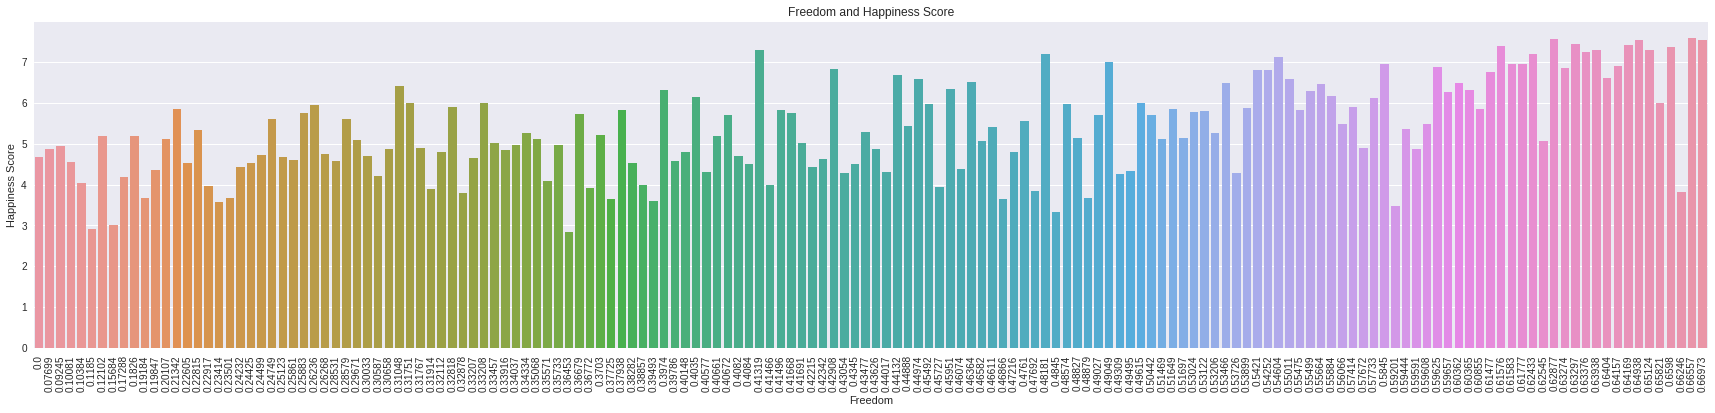

In [199]:
plt.figure(figsize=(30,6))
sns.barplot(x="Freedom",y="Happiness Score",data=result6)
plt.xlabel("Freedom")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Freedom and Happiness Score")
plt.show()

Checking to see the output limited to 50 values

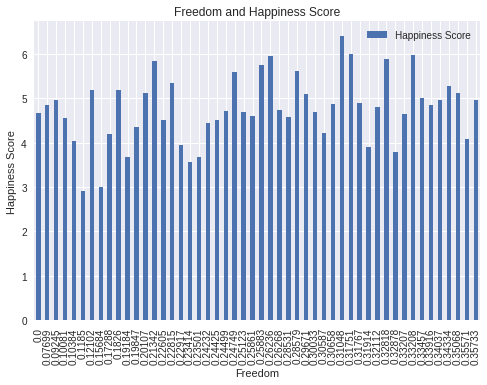

In [200]:
query=''' SELECT "Country", "Freedom" , "Happiness Score" 
FROM happ_df
ORDER BY "Freedom"
LIMIT 50  ;

'''
result6i=pysqldf(query)
result6i
plt.figure(figsize=(18,13))
result6i.plot.bar(x="Freedom",y="Happiness Score")
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.title("Freedom and Happiness Score")
plt.show()

In [201]:
corr_coeff=happ_df["Happiness Score"].corr(happ_df["Freedom"])
corr_coeff

0.56821090419251763

## Regression Analysis

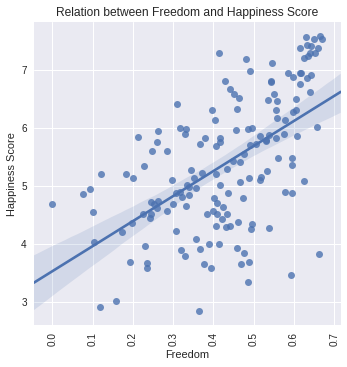

In [202]:
sns.lmplot(x="Freedom",y="Happiness Score",data=result6)
plt.xlabel("Freedom")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Relation between Freedom and Happiness Score")
plt.show()

## Spearman's Correlation

In [203]:
corr, pval = spearmanr(result6["Freedom"], result6["Happiness Score"])
print("Spearman correlation coefficient:", corr)
print("p-value:", pval)

Spearman correlation coefficient: 0.576352173129
p-value: 2.30130101897e-15


## Pivot Table

In [204]:
pivot_table=result6.pivot_table(index=["Country","Happiness Score"],values="Freedom",
                                aggfunc='mean')
pivot_table=pivot_table.sort_values(by='Freedom')
pivot_table

,,Freedom
Country,Happiness Score,
Iraq,4.677,0.00000
Greece,4.857,0.07699
Bosnia and Herzegovina,4.949,0.09245
Sudan,4.550,0.10081
Angola,4.033,0.10384
Burundi,2.905,0.11850
Pakistan,5.194,0.12102
Syria,3.006,0.15684
Egypt,4.194,0.17288


In [205]:
cross_tab=pd.crosstab(index=result6['Country'],columns=result6['Freedom'],values=result6['Happiness Score'],
                      aggfunc='mean',margins=True)
cross_tab.replace(np.nan,'',inplace=True)
cross_tab

Freedom,0.0,0.07699,0.09245,0.10081,0.10384000000000002,0.1185,0.12102,0.15684,0.17288,0.1826,...,0.64157,0.64169,0.6493800000000001,0.6512399999999999,0.6582100000000001,0.6598,0.66246,0.66557,0.66973,All
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,,,,,,,,,,...,,,,,,,,,,3.575000
Albania,,,,,,,,,,,...,,,,,,,,,,4.959000
Algeria,,,,,,,,,,,...,,,,,,,,,,5.605000
Angola,,,,,4.033,,,,,,...,,,,,,,,,,4.033000
Argentina,,,,,,,,,,,...,,,,,,,,,,6.574000
Armenia,,,,,,,,,,,...,,,,,,,,,,4.350000
Australia,,,,,,,,,,,...,,,,7.284,,,,,,7.284000
Austria,,,,,,,,,,,...,,,,,,,,,,7.200000
Azerbaijan,,,,,,,,,,,...,,,,,,,,,,5.212000


# Conclusion
There is a moderate positive correlation b/w Happiness Score and Freedom

## Q7) Can you determine how much does having Family contribute to the Happiness Score?

In [206]:
query=''' SELECT "Country","Family","Happiness Score"
FROM happ_df
ORDER BY "Family" DESC;

'''
result7=pysqldf(query)
result7

,Country,Family,Happiness Score
0,Iceland,1.40223,7.561
1,Ireland,1.36948,6.940
2,Denmark,1.36058,7.527
3,Switzerland,1.34951,7.587
4,Uzbekistan,1.34043,6.003
5,Norway,1.33095,7.522
6,Canada,1.32261,7.427
7,New Zealand,1.31967,7.286
8,Finland,1.31826,7.406
9,Spain,1.31379,6.329


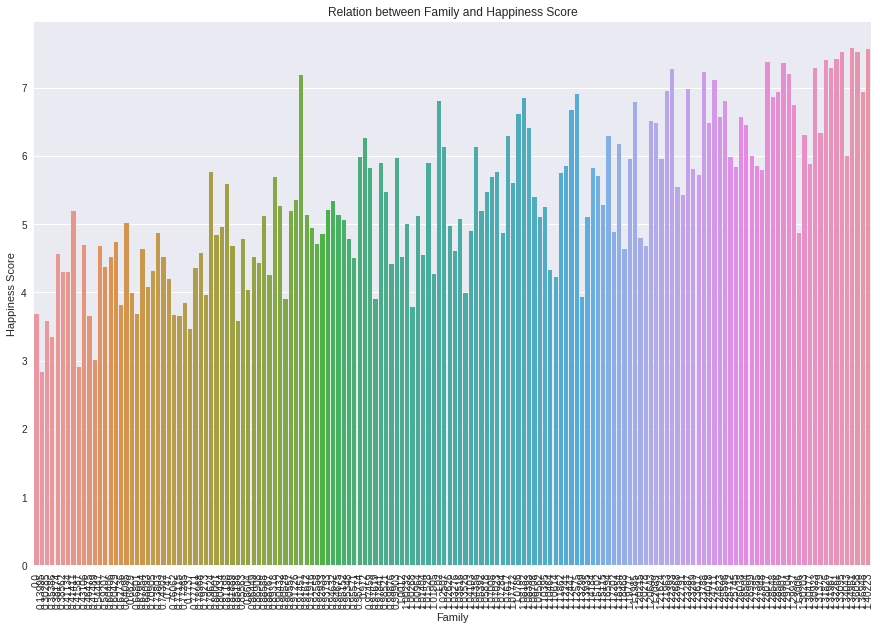

In [207]:

plt.figure(figsize=(15,10))
sns.barplot(x="Family",y="Happiness Score",data=result7)
plt.xlabel("Family")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Relation between Family and Happiness Score")
plt.show()

We can also perform regression analysis as x-axis values appears to be messy

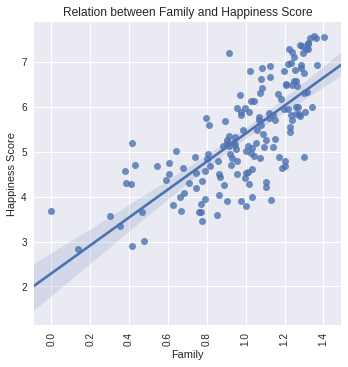

In [208]:
sns.lmplot(x="Family",y="Happiness Score",data=result7)
plt.xlabel("Family")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Relation between Family and Happiness Score")
plt.show()

## Spearman's correlation

In [209]:
corr, pval = spearmanr(result7["Family"], result7["Happiness Score"])
print("Spearman correlation coefficient:", corr)
print("p-value:", pval)

Spearman correlation coefficient: 0.770037962543
p-value: 2.93848445211e-32


## Pivot tables

In [210]:
pivot_table=result7.pivot_table(index=["Country","Happiness Score"],values="Family",
                                aggfunc='mean')
pivot_table=pivot_table.sort_values(by='Family')
pivot_table

,,Family
Country,Happiness Score,
Central African Republic,3.678,0.00000
Togo,2.839,0.13995
Afghanistan,3.575,0.30285
Benin,3.340,0.35386
India,4.565,0.38174
Georgia,4.297,0.38562
Malawi,4.292,0.41134
Pakistan,5.194,0.41411
Burundi,2.905,0.41587


In [211]:
## A rather detailed one
pivot_table=happ_df.pivot_table(index=["Region","Country","Family"],values=["Happiness Score","Happiness Rank"],
                                aggfunc='mean')
pivot_table

Happiness Rank  \
Region                     Country                Family                    
Australia and New Zealand  Australia              1.30923              10   
                           New Zealand            1.31967               9   
Central and Eastern Europe Albania                0.80434              95   
                           Armenia                0.77711             127   
                           Azerbaijan             0.93793              80   
                           Belarus                1.23289              59   
                           Bosnia and Herzegovina 0.91916              96   
                           Bulgaria               1.10614             134   
                           Croatia                0.79624              62   
                           Czech Republic         1.20643              31   
                           Estonia                1.22791              73   
                           Georgia                0.38562             130   
                           Hungary                1.20215             104   
                           Kazakhstan             1.12241              54   
                           Kosovo                 0.81198              69   
                           Kyrgyzstan             1.15115              77   
                           Latvia                 1.09562              89   
                           Lithuania              1.25745              56   
                           Macedonia              1.00232              93   
                           Moldova                1.01528              52   
                           Montenegro             0.90557              82   
                           Poland                 1.27948              60   
                           Romania                0.88588              86   
                           Russia                 1.23617              64   
                           Serbia                 1.00964              87   
                           Slovakia               1.26999              45   
                           Slovenia               1.27385              55   
                           Tajikistan             0.85563             106   
                           Turkmenistan           1.22668              70   
                           Ukraine                1.20278             111   
...                                                                   ...   
Sub-Saharan Africa         Somaliland region      0.95152              91   
                           South Africa           1.18468             113   
                           Sudan                  1.01404             118   
                           Swaziland              1.07284             101   
                           Tanzania               1.00268             146   
                           Togo                   0.13995             158   
                           Uganda                 1.13299             141   
                           Zambia                 0.91612              85   
                           Zimbabwe               1.03276             115   
Western Europe             Austria                1.29704              13   
                           Belgium                1.28566              19   
                           Cyprus                 0.89318              67   
                           Denmark                1.36058               3   
                           Finland                1.31826               6   
                           France                 1.26038              29   
                           Germany                1.29937              26   
                           Greece                 0.92933             102   
                           Iceland                1.40223               2   
                           Ireland                1.36948              18   
                           Italy                  1.197

## Cross tab

In [212]:
cross_tab=pd.crosstab(index=result7['Country'],columns=result7['Family'],values=result7['Happiness Score'],
                      aggfunc='mean',margins=True)
cross_tab.replace(np.nan,'',inplace=True)
cross_tab

Family,0.0,0.13995,0.30285,0.35386,0.38174,0.38561999999999996,0.41134,0.41411000000000003,0.41586999999999996,0.43106000000000005,...,1.31826,1.3196700000000001,1.32261,1.33095,1.34043,1.34951,1.36058,1.36948,1.4022299999999999,All
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,,3.575,,,,,,,,...,,,,,,,,,,3.575000
Albania,,,,,,,,,,,...,,,,,,,,,,4.959000
Algeria,,,,,,,,,,,...,,,,,,,,,,5.605000
Angola,,,,,,,,,,,...,,,,,,,,,,4.033000
Argentina,,,,,,,,,,,...,,,,,,,,,,6.574000
Armenia,,,,,,,,,,,...,,,,,,,,,,4.350000
Australia,,,,,,,,,,,...,,,,,,,,,,7.284000
Austria,,,,,,,,,,,...,,,,,,,,,,7.200000
Azerbaijan,,,,,,,,,,,...,,,,,,,,,,5.212000


## Analysis
Positive correlation b/w Family and the Happiness Scores, regression line also confirms the hypothesis as we have a positive slope

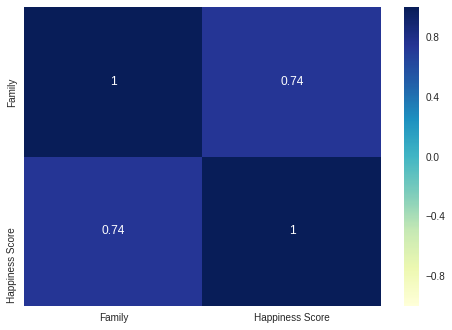

In [213]:
data=happ_df[["Family","Happiness Score"]]
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",center=0)

## Conclusion
As there is a strong positive correlation b/w Family and Happiness Score,
As one variable increases, the other increases as well and vice versa.
Important Note: Correlation doesn't imply causation as there are other factors as well that might be affecting the Happiness Score

## Q8) Are more generous people happier?

In [214]:
query=''' SELECT "Country","Generosity","Happiness Score"
FROM happ_df
ORDER BY "Generosity";
'''
result8= pysqldf(query)
result8

,Country,Generosity,Happiness Score
0,Greece,0.00000,4.857
1,Russia,0.00199,5.716
2,Lithuania,0.02641,5.833
3,Croatia,0.05444,5.759
4,Georgia,0.05547,4.297
5,Venezuela,0.05841,6.810
6,Tunisia,0.06431,4.739
7,Gabon,0.06822,3.896
8,Morocco,0.07172,5.013
9,Azerbaijan,0.07799,5.212


Average Happiness Score is:

In [215]:
avg_happ_score=happ_df["Happiness Score"].mean()
avg_happ_score

5.3757341772151896

## Raw Observation:
The most generous country i.e., Myanmar has a Generosity Score of 0.79588 but a Happiness Score of 4.307 which 
is less than the above average happiness score in the world

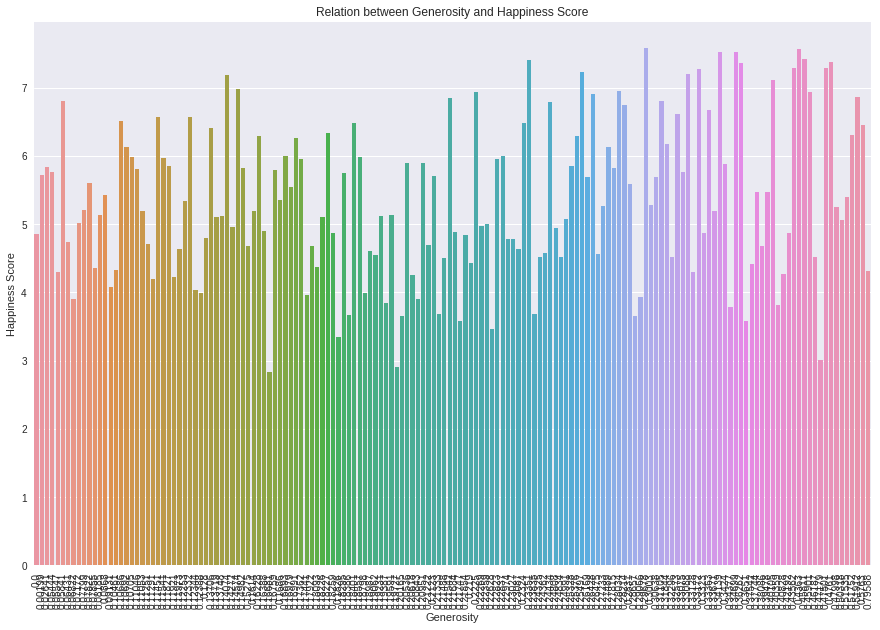

In [216]:
plt.figure(figsize=(15,10))
sns.barplot(x="Generosity",y="Happiness Score",data=result8,order=result8["Generosity"])
plt.xlabel("Generosity")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Relation between Generosity and Happiness Score")
plt.show()

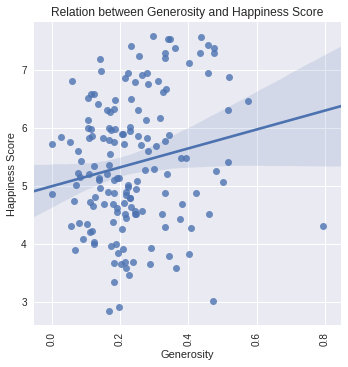

In [217]:
sns.lmplot(x="Generosity",y="Happiness Score",data=result8)
plt.xlabel("Generosity")
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Relation between Generosity and Happiness Score")
plt.show()

## Conclusion:
    There is a weak positive correlation between Generosity and Happiness Score, the relationship 
    is not that strong or consistent

## Spearman's correlation

In [218]:
corr, pval = spearmanr(result8["Generosity"], result8["Happiness Score"])
print("Spearman correlation coefficient:", corr)
print("p-value:", pval)

Spearman correlation coefficient: 0.172462971119
p-value: 0.0302443148451


## Pivot table

In [219]:
pivot_table=result8.pivot_table(index=["Country","Happiness Score"],values=["Generosity"],
                                aggfunc='mean')
pivot_table=pivot_table.sort_values(by='Generosity')

pivot_table

,,Generosity
Country,Happiness Score,
Greece,4.857,0.00000
Russia,5.716,0.00199
Lithuania,5.833,0.02641
Croatia,5.759,0.05444
Georgia,4.297,0.05547
Venezuela,6.810,0.05841
Tunisia,4.739,0.06431
Gabon,3.896,0.06822
Morocco,5.013,0.07172


In [220]:
##just an additional table with more details
pivot_table=happ_df.pivot_table(index=["Region","Country"],values=["Generosity","Happiness Score","Happiness Rank"],
                                aggfunc='mean')

pivot_table

Generosity  Happiness Rank  \
Region                     Country                                              
Australia and New Zealand  Australia                  0.43562              10   
                           New Zealand                0.47501               9   
Central and Eastern Europe Albania                    0.14272              95   
                           Armenia                    0.07855             127   
                           Azerbaijan                 0.07799              80   
                           Belarus                    0.11046              59   
                           Bosnia and Herzegovina     0.24808              96   
                           Bulgaria                   0.11921             134   
                           Croatia                    0.05444              62   
                           Czech Republic             0.10686              31   
                           Estonia                    0.08680              73   
                           Georgia                    0.05547             130   
                           Hungary                    0.12800             104   
                           Kazakhstan                 0.11827              54   
                           Kosovo                     0.28310              69   
                           Kyrgyzstan                 0.30030              77   
                           Latvia                     0.18226              89   
                           Lithuania                  0.02641              56   
                           Macedonia                  0.22359              93   
                           Moldova                    0.20951              52   
                           Montenegro                 0.16140              82   
                           Poland                     0.16759              60   
                           Romania                    0.13748              86   
                           Russia                     0.00199              64   
                           Serbia                     0.19231              87   
                           Slovakia                   0.16893              45   
                           Slovenia                   0.25328              55   
                           Tajikistan                 0.22974             106   
                           Turkmenistan               0.16979              70   
                           Ukraine                    0.15275             111   
...                                                       ...             ...   
Sub-Saharan Africa         Somaliland region          0.50318              91   
                           South Africa               0.11973             113   
                           Sudan                      0.19062             118   
                           Swaziland                  0.18259             101   
                           Tanzania                   0.34377             146   
                           Togo                       0.16681             158   
                           Uganda                     0.29066             141   
                           Zambia                     0.19591              85   
                           Zimbabwe                   0.18987             115   
Western Europe             Austria                    0.33088              13   
                           Belgium                    0.22250              19   
                           Cyprus                     0.30638              67   
                           Denmark                    0.34139               3   
                           Finland                    0.23351               6   
                           France                     0.12332              29   
                           Germany                    0.28214              26   
                           Greece                     0.00000             102   
 

## Cross tab

In [221]:
cross_tab=pd.crosstab(index=result8['Country'],columns=result8['Generosity'],values=result8['Happiness Score'],
                      aggfunc='mean',margins=True)
cross_tab.replace(np.nan,'',inplace=True)
cross_tab

Generosity,0.0,0.00199,0.026410000000000003,0.054439999999999995,0.055470000000000005,0.058410000000000004,0.06431,0.06822,0.07172,0.07799,...,0.47501000000000004,0.4761,0.47998,0.5031800000000001,0.51535,0.51752,0.51912,0.5763,0.79588,All
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,,,,,,,,,,...,,,,,,,,,,3.575000
Albania,,,,,,,,,,,...,,,,,,,,,,4.959000
Algeria,,,,,,,,,,,...,,,,,,,,,,5.605000
Angola,,,,,,,,,,,...,,,,,,,,,,4.033000
Argentina,,,,,,,,,,,...,,,,,,,,,,6.574000
Armenia,,,,,,,,,,,...,,,,,,,,,,4.350000
Australia,,,,,,,,,,,...,,,,,,,,,,7.284000
Austria,,,,,,,,,,,...,,,,,,,,,,7.200000
Azerbaijan,,,,,,,,,,5.212,...,,,,,,,,,,5.212000


## Q9) Can you analyze Happiness and Generosity Scores based on Region?

In [222]:
query='''SELECT DISTINCT "Region",AVG("Generosity") AS "avg_generosity" ,AVG("Happiness Score") AS "avg_happiness_score"
FROM happ_df
GROUP BY "Region"
ORDER BY "avg_generosity" DESC;
'''
result9=pysqldf(query)
result9

,Region,avg_generosity,avg_happiness_score
0,Australia and New Zealand,0.455315,7.285000
1,North America,0.429580,7.273000
2,Southeastern Asia,0.419261,5.317444
3,Southern Asia,0.341429,4.580857
4,Western Europe,0.302109,6.689619
5,Eastern Asia,0.225885,5.626167
6,Sub-Saharan Africa,0.221137,4.202800
7,Latin America and Caribbean,0.217788,6.144682
8,Middle East and Northern Africa,0.190375,5.406900
9,Central and Eastern Europe,0.152264,5.332931


## Visualization and Analysis

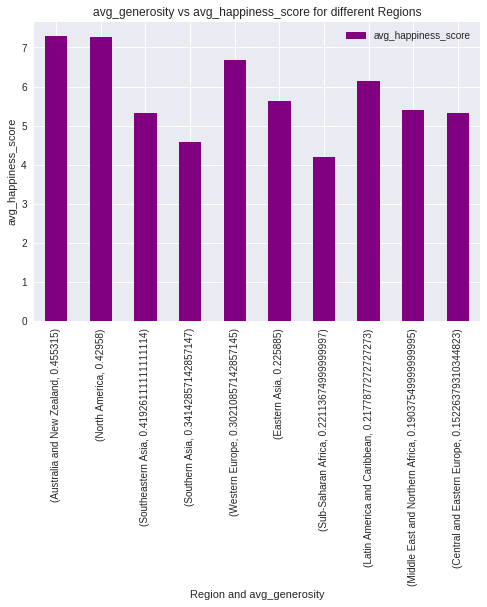

In [223]:
result9.plot.bar(x=["Region","avg_generosity"], y="avg_happiness_score",color="purple")
plt.xlabel("Region and avg_generosity")
plt.ylabel("avg_happiness_score")
plt.title("avg_generosity vs avg_happiness_score for different Regions")
plt.show()

## Observations:
Most Generous Region i.e., Middle East and North Africa has less than Average Happiness Score

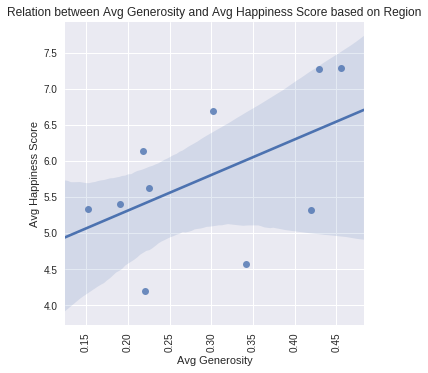

In [224]:
sns.lmplot(x="avg_generosity",y="avg_happiness_score",data=result9)
plt.xlabel("Avg Generosity")
plt.xticks(rotation=90)
plt.ylabel("Avg Happiness Score")
plt.title("Relation between Avg Generosity and Avg Happiness Score based on Region")
plt.show()

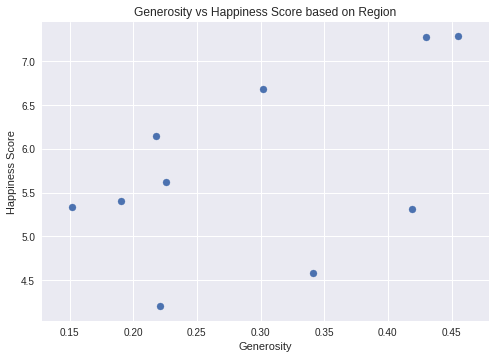

In [225]:
plt.scatter(result9['avg_generosity'],result9['avg_happiness_score'])
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.title("Generosity vs Happiness Score based on Region")
plt.show()

## Conclusion
There is a lack of uniformity in data, although this does look like a positive correlation 

## Spearman's correlation analysis

In [226]:
corr, pval = spearmanr(result9["avg_generosity"], result9["avg_happiness_score"])
print("Spearman correlation coefficient:", corr)
print("p-value:", pval)

Spearman correlation coefficient: 0.406060606061
p-value: 0.244282294087


## Pivot Table

In [227]:
pivot_table=result9.pivot_table(index=["Region","avg_happiness_score"],values=["avg_generosity"],
                                aggfunc='mean')
pivot_table=pivot_table.sort_values(by='avg_generosity')
pivot_table

,,avg_generosity
Region,avg_happiness_score,
Central and Eastern Europe,5.332931,0.152264
Middle East and Northern Africa,5.406900,0.190375
Latin America and Caribbean,6.144682,0.217788
Sub-Saharan Africa,4.202800,0.221137
Eastern Asia,5.626167,0.225885
Western Europe,6.689619,0.302109
Southern Asia,4.580857,0.341429
Southeastern Asia,5.317444,0.419261
North America,7.273000,0.429580


In [228]:
cross_tab=pd.crosstab(index=result9['Region'],columns=result9['avg_generosity'],values=result9['avg_happiness_score'],
                      aggfunc='mean',margins=True)
cross_tab.replace(np.nan,'',inplace=True)
cross_tab

avg_generosity,0.15226379310344823,0.19037549999999995,0.2177877272727273,0.22113674999999997,0.225885,0.30210857142857145,0.34142857142857147,0.41926111111111114,0.42958,0.455315,All
Region,,,,,,,,,,,
Australia and New Zealand,,,,,,,,,,7.285,7.285000
Central and Eastern Europe,5.33293,,,,,,,,,,5.332931
Eastern Asia,,,,,5.62617,,,,,,5.626167
Latin America and Caribbean,,,6.14468,,,,,,,,6.144682
Middle East and Northern Africa,,5.4069,,,,,,,,,5.406900
North America,,,,,,,,,7.273,,7.273000
Southeastern Asia,,,,,,,,5.31744,,,5.317444
Southern Asia,,,,,,,4.58086,,,,4.580857
Sub-Saharan Africa,,,,4.2028,,,,,,,4.202800


## Q10) Do you think there are some factors that have stronger relationship with the Happiness score than others, if so, can you determine them?

In [229]:
query=''' SELECT *
FROM happ_df
'''
result10=pysqldf(query)
correlation_matrix=result10.corr()
correlation_matrix2=result10.corr()
correlation_matrix3=result10.corr()
correlation_matrix

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


We got a correlation matrix, but we don't need repetitive values, it makes the matrix, rather difficult to analyze

## Dropping duplicates from the correlation matrix

In [230]:
for i in range(len(correlation_matrix2.columns)):
    for j in range(i):
        correlation_matrix2.iloc[i,j]=np.nan
correlation_matrix3=correlation_matrix2.fillna('')
correlation_matrix3


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,,1,-0.177254,0.780966,0.740605,0.7242,0.568211,0.395199,0.180319,0.530474
Standard Error,,,1,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.0884387,0.083981
Economy (GDP per Capita),,,,1,0.645299,0.816478,0.3703,0.307885,-0.0104654,0.040059
Family,,,,,1,0.531104,0.441518,0.205605,0.0875132,0.148117
Health (Life Expectancy),,,,,,1,0.360477,0.248335,0.108335,0.018979
Freedom,,,,,,,1,0.493524,0.373916,0.062783
Trust (Government Corruption),,,,,,,,1,0.276123,-0.033105
Generosity,,,,,,,,,1,-0.101301
Dystopia Residual,,,,,,,,,,1.000000


## Visualizations and Analysis

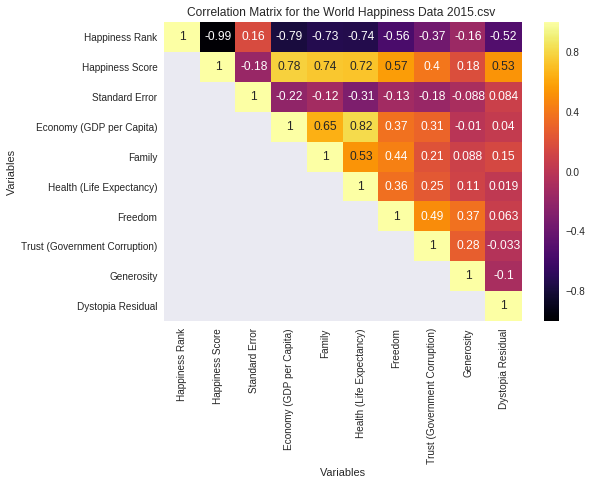

In [231]:
sns.heatmap(correlation_matrix2,cmap='inferno',annot=True)
plt.title('Correlation Matrix for the World Happiness Data 2015.csv ')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

## Conclusion :
    The positive correlations are (Economy(GDP per Capita),Family,Health(Life Expectancy), Freedom.Trust(Government Corruption),Generosity,Dystopia Residual)
    The strongest correlation is that of Economy(GDP per Capita) and the Happiness Score
    Family, Health(Life expectancy) have Strong positive correlation
    Freedom and Trust(Government Corruption) have mild positive correlation
    Generosity has weak positive correlation
    Dystopia Residual has mild positive correlation with Happiness Score ( but this doesn't really matter as it is not a real factor affecting the Happiness Score)
        Only Standard Error has negative correlation with the Happiness Score (But this is not included as it is not a means to measure happiness)


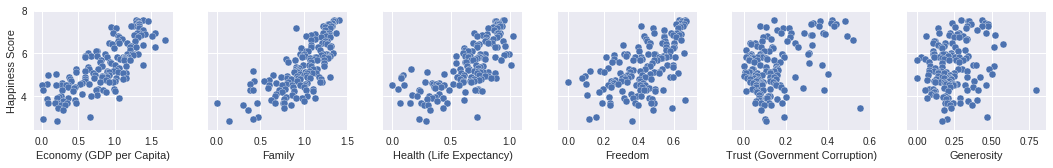

In [232]:
sns.pairplot(result10,y_vars=['Happiness Score'],x_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'
                                                         ,'Generosity'])
plt.show()

## Pivot table
Showing the factors that affect the Happiness Score for each Country
Ordered in terms of Happiness Score in Ascending order

In [233]:
pivot_table=result10.pivot_table(index='Country',values=['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'
                                                         ,'Generosity'])
pivot_table=pivot_table.sort_values(by='Happiness Score')

pivot_table
            

,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
Country,,,,,,,
Togo,0.20868,0.13995,0.36453,0.16681,2.839,0.28443,0.10731
Burundi,0.01530,0.41587,0.11850,0.19727,2.905,0.22396,0.10062
Syria,0.66320,0.47489,0.15684,0.47179,3.006,0.72193,0.18906
Benin,0.28665,0.35386,0.48450,0.18260,3.340,0.31910,0.08010
Rwanda,0.22208,0.77370,0.59201,0.22628,3.465,0.42864,0.55191
Afghanistan,0.31982,0.30285,0.23414,0.36510,3.575,0.30335,0.09719
Burkina Faso,0.25812,0.85188,0.39493,0.21747,3.587,0.27125,0.12832
Ivory Coast,0.46534,0.77115,0.46866,0.20165,3.655,0.15185,0.17922
Guinea,0.17417,0.46475,0.37725,0.28657,3.656,0.24009,0.12139


## Pivot table
Showing the factors that should be taken into consideration in order to produce correct values of the Happiness Score

In [234]:
pivot_table=result10.pivot_table(index='Country',values=['Standard Error','Dystopia Residual'])
pivot_table
            

,Dystopia Residual,Standard Error
Country,,
Afghanistan,1.95210,0.03084
Albania,1.89894,0.05013
Algeria,2.43209,0.05099
Angola,1.94939,0.04758
Argentina,2.83600,0.04612
Armenia,1.75873,0.04763
Australia,2.26646,0.04083
Austria,2.53320,0.03751
Azerbaijan,2.00073,0.03363
